# Linear Regression

Mean Squared Error (MSE): 1433.3304
Root Mean Squared Error (RMSE): 37.8594
Mean Absolute Percentage Error (MAPE): 1.2705


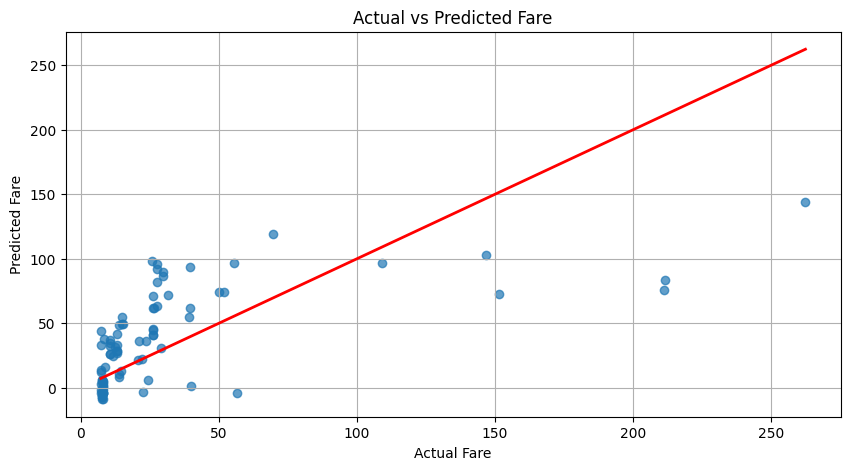

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Titanic dataset
titanic_df = pd.read_csv(filepath_or_buffer=r"data\Titanic\tested.csv")

# Preprocessing
# Fill missing values in 'Age' with mean and 'Embarked' with mode
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace=True)

# Convert categorical variables to dummy variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# Features and target variable
# We'll try to predict 'Fare' using various features
X = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Fare']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the error metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Visualizing the predictions vs actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2) # Line for perfect predictions
plt.title('Actual vs Predicted Fare')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.grid()
plt.show()

# Logistic regression

In [3]:
from sklearn.linear_model import LogisticRegression

# Features and target variable
X = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the error metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")


Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Percentage Error (MAPE): 0.0000


## Interpretation of Error Metrics
* **Mean Squared Error (MSE):**
MSE quantifies the average squared difference between the predicted and actual values. A lower MSE indicates a better fit of the model. However, it can be sensitive to outliers because errors are squared.
* **Root Mean Squared Error (RMSE):**
RMSE is the square root of MSE and is expressed in the same units as the target variable. It represents the standard deviation of the residuals (prediction errors). A lower RMSE indicates better performance, providing a more interpretable metric compared to MSE.
* **Mean Absolute Percentage Error (MAPE):**
MAPE represents the average absolute percentage error between predicted and actual values. It is a useful metric for evaluating prediction accuracy, particularly in a business context, as it provides a percentage error that is easy to interpret. A lower MAPE indicates a more accurate model.

# Naïve Bayes Classifier

Confusion Matrix:
[[50  0]
 [ 0 34]]
Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
F1 Score: 1.0000


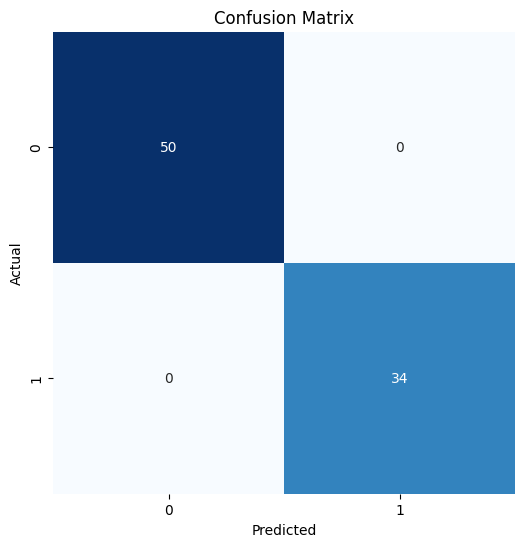

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Features and target variable
X = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Naïve Bayes Classifier model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate Specificity
# Specificity = TN / (TN + FP)
TN = cm[0][0]  # True Negatives
FP = cm[0][1]  # False Positives
specificity = TN / (TN + FP)

# Print the metrics
print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualizing the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
classification_rep=classification_report(y_test,y_pred)
print('Classification Report:\n',classification_rep)

# K-Nearest Neighbors 

Confusion Matrix:
[[42  8]
 [24 10]]
Precision: 0.5556
Recall: 0.2941
Specificity: 0.8400
F1 Score: 0.3846


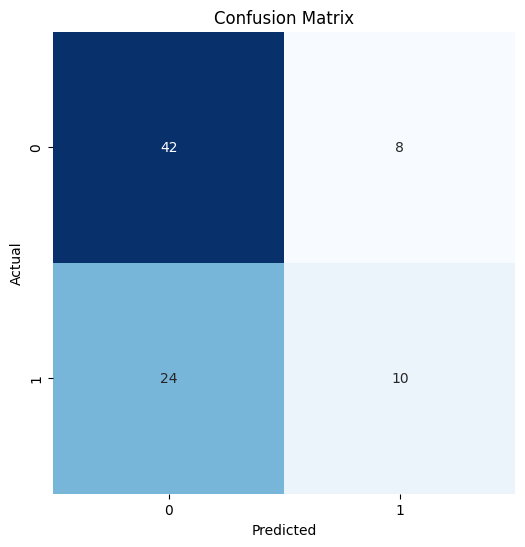

Accuracy: 0.6190476190476191
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.84      0.72        50
           1       0.56      0.29      0.38        34

    accuracy                           0.62        84
   macro avg       0.60      0.57      0.55        84
weighted avg       0.60      0.62      0.59        84



In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Features and target variable
X = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create K-Nearest Neighbors model
k = 5  # You can choose the value of k
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate Specificity
# Specificity = TN / (TN + FP)
TN = cm[0][0]  # True Negatives
FP = cm[0][1]  # False Positives
specificity = TN / (TN + FP)

# Print the metrics
print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualizing the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
classification_rep=classification_report(y_test,y_pred)
print('Classification Report:\n',classification_rep)

# Decision Trees

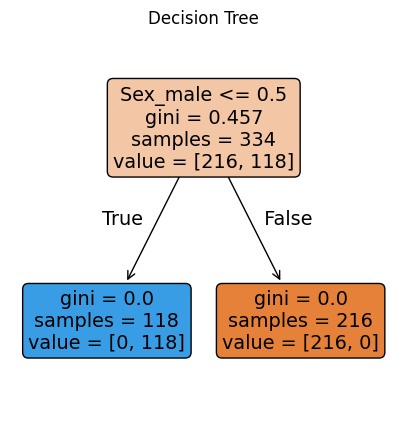

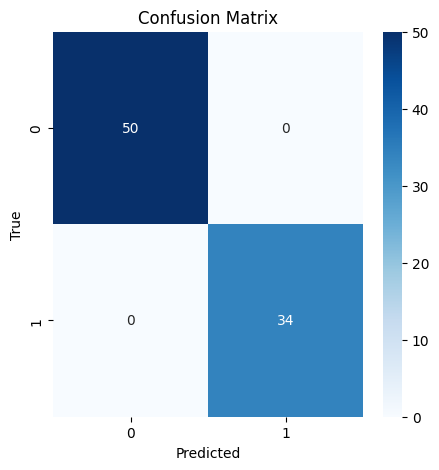

In [19]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred_dtc=dt.predict(X_test)

plt.figure(figsize=(5,5))
plot_tree(dt,filled=True,feature_names=X.columns,rounded=True)
plt.title('Decision Tree')
plt.show()

plt.figure(figsize=(5,5))
cm=confusion_matrix(y_test,y_pred_dtc)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Random Forest

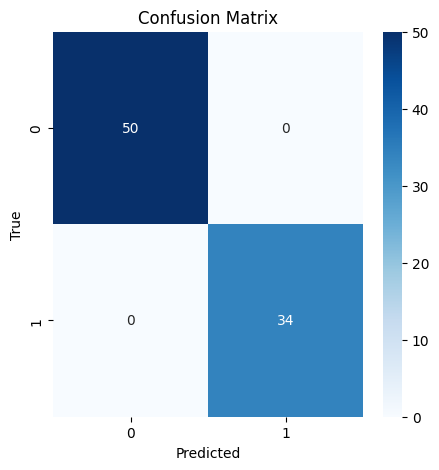

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred_rfc=rf.predict(X_test)

plt.figure(figsize=(5,5))
cm=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

accuracy=accuracy_score(y_test,y_pred_rfc)
print('Accuracy:',accuracy)
classification_rep=classification_report(y_test,y_pred_rfc)
print('Classification Report:\n',classification_rep)

# SVM

In [26]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [27]:
y_pred_svm=svm.predict(X_test)

In [28]:
accuracy=accuracy_score(y_test,y_pred_svm)
print('Accuracy:',accuracy)
classification_rep=classification_report(y_test,y_pred_svm)
print('Classification Report:\n',classification_rep)

Accuracy: 0.6071428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.98      0.75        50
           1       0.67      0.06      0.11        34

    accuracy                           0.61        84
   macro avg       0.64      0.52      0.43        84
weighted avg       0.63      0.61      0.49        84



## Fine tuning SVM

In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the Titanic dataset
df = pd.read_csv(filepath_or_buffer=r"data\Titanic\tested.csv")

# Preprocessing
# Fill missing values in 'Age' with mean and 'Embarked' with mode
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Fare'].fillna(df['Fare'].median(), inplace = True)
df.drop(['Cabin', 'Name', 'Ticket'], axis = 1, inplace = True)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [30]:
#feature Engg
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
print(df['Sex'].head())
print(df['Embarked'].head())

0    1
1    0
2    1
3    1
4    0
Name: Sex, dtype: int32
0    1
1    2
2    1
3    2
4    2
Name: Embarked, dtype: int32


In [31]:
X = df.drop('Survived', axis =1)
Y = df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.25, random_state = 44, stratify = Y )

In [32]:
#std
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [33]:
svm = SVC(kernel = 'rbf', C =1, gamma = 'scale', random_state = 44)
svm.fit(X_train_s, Y_train)

SVC(C=1, random_state=44)

In [34]:
Y_pred = svm.predict(X_test_s)

Accuracy: 0.9809523809523809
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        67
           1       0.95      1.00      0.97        38

    accuracy                           0.98       105
   macro avg       0.97      0.99      0.98       105
weighted avg       0.98      0.98      0.98       105



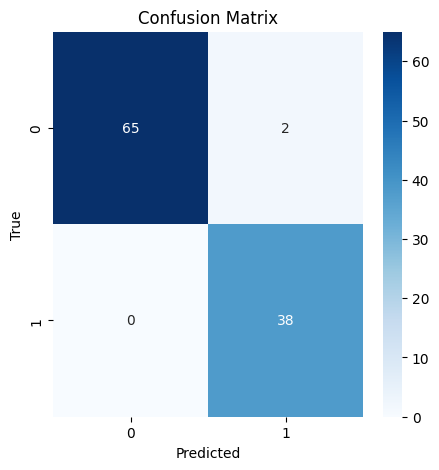

In [37]:
accuracy=accuracy_score(Y_test,Y_pred)
print('Accuracy:',accuracy)
classification_rep=classification_report(Y_test,Y_pred)
print('Classification Report:\n',classification_rep)

plt.figure(figsize=(5,5))
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Time series analysis

[*********************100%***********************]  1 of 1 completed


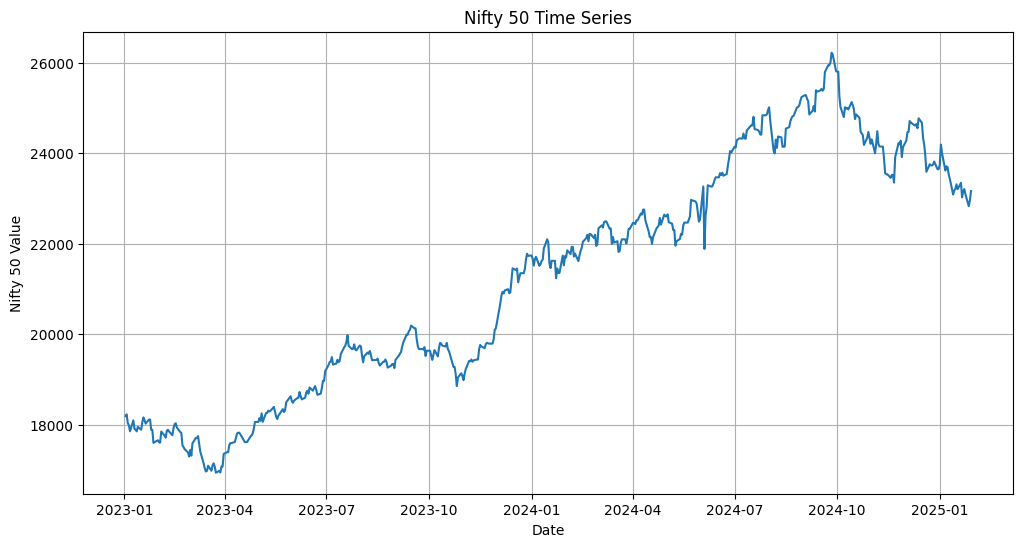

ADF Statistic: -1.0041150157925642
p-value: 0.7517604863298974


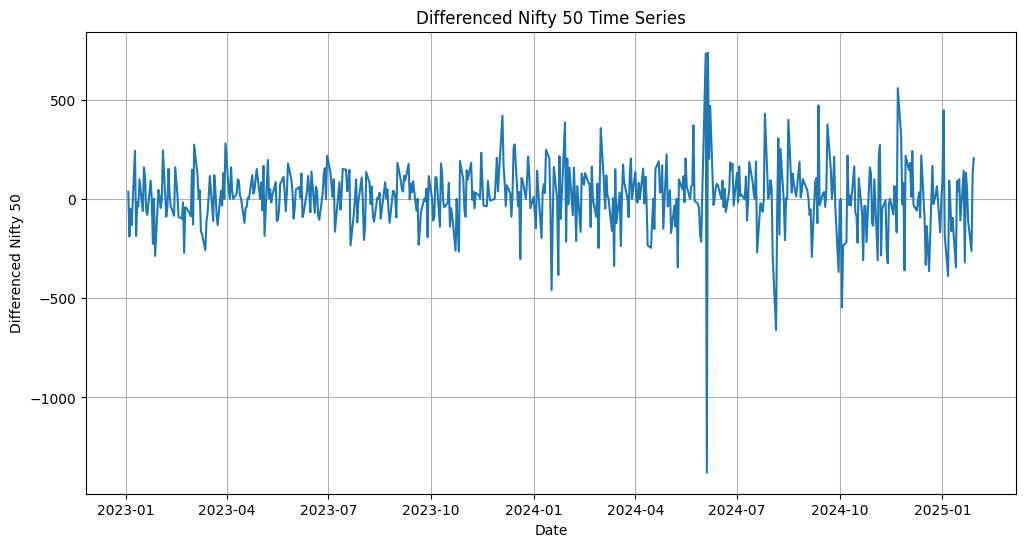

                            AutoReg Model Results                             
Dep. Variable:                  ^NSEI   No. Observations:                  543
Model:                     AutoReg(1)   Log Likelihood               -3534.616
Method:               Conditional MLE   S.D. of innovations            164.431
Date:                Thu, 30 Jan 2025   AIC                           7075.232
Time:                        21:32:12   BIC                           7088.118
Sample:                    01-03-2023   HQIC                          7080.271
                         - 01-29-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.3879     58.922      1.195      0.232     -45.098     185.874
^NSEI.L1       0.9971      0.003    362.545      0.000       0.992       1.003
                                    Roots           

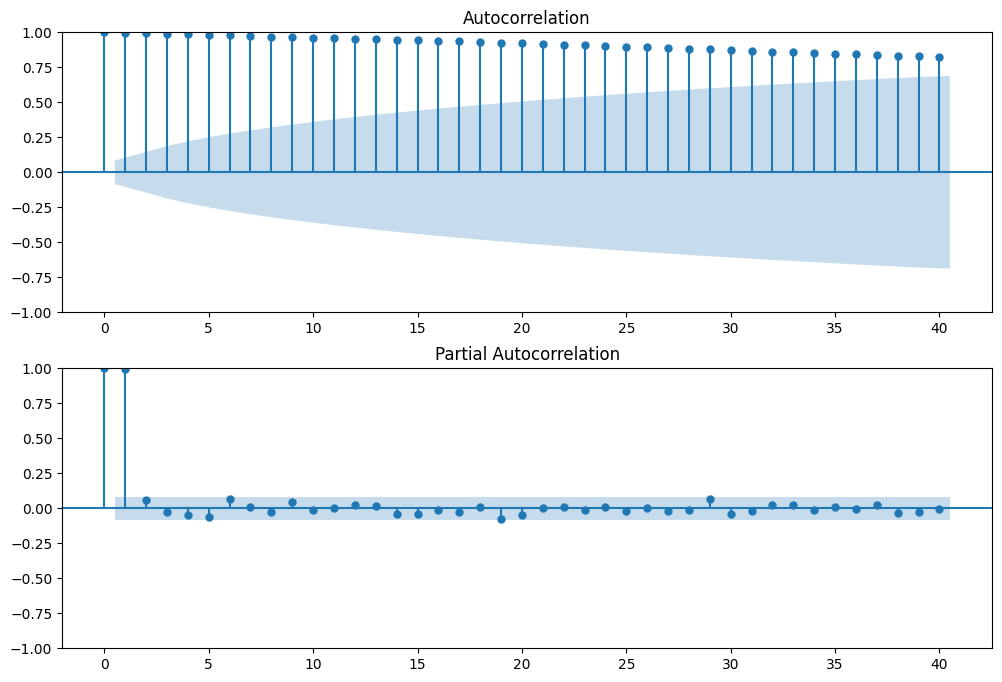

                               SARIMAX Results                                
Dep. Variable:                  ^NSEI   No. Observations:                  543
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -4686.190
Date:                Thu, 30 Jan 2025   AIC                           9378.380
Time:                        21:32:15   BIC                           9391.271
Sample:                    01-02-2023   HQIC                          9383.420
                         - 01-29-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.127e+04    114.105    186.428      0.000     2.1e+04    2.15e+04
ma.L1          0.9490      0.014     66.212      0.000       0.921       0.977
sigma2      1.827e+06   1.81e+05     10.101      0.0

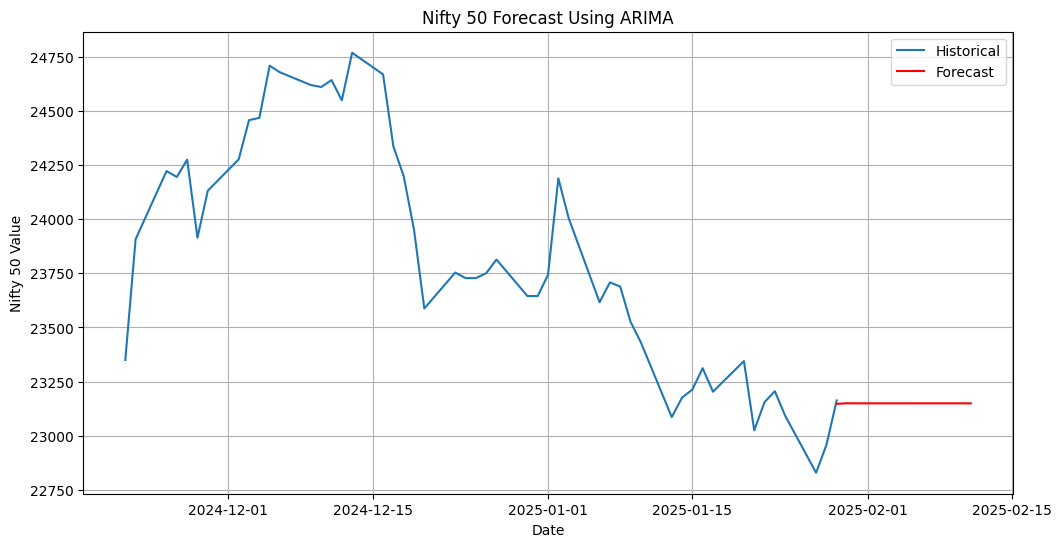

In [39]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Step 1: Fetch Nifty 50 Data
nifty_data = yf.download("^NSEI", start="2023-01-01", end="2025-01-30")
nifty_data = nifty_data[['Close']]
nifty_data = nifty_data.rename(columns={'Close': 'Nifty 50'}).reset_index()

# Step 2: Prepare the Data
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data.set_index('Date', inplace=True)
nifty_data = nifty_data.asfreq('B')  # Business days frequency
nifty_data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Step 3: Perform Time Series Analysis
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(nifty_data['Nifty 50'])
plt.title('Nifty 50 Time Series')
plt.xlabel('Date')
plt.ylabel('Nifty 50 Value')
plt.grid()
plt.show()

# Check for stationarity
result = adfuller(nifty_data['Nifty 50'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing if not stationary
nifty_data['Differenced'] = nifty_data['Nifty 50'].diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(nifty_data['Differenced'])
plt.title('Differenced Nifty 50 Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Nifty 50')
plt.grid()
plt.show()

# AR Model
from statsmodels.tsa.ar_model import AutoReg

# Fit AR Model
ar_model = AutoReg(nifty_data['Nifty 50'], lags=1)
ar_result = ar_model.fit()
print(ar_result.summary())

# MA Model
from statsmodels.tsa.stattools import acf, pacf

# Plot ACF and PACF for MA and AR respectively
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(nifty_data['Nifty 50'].dropna(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(nifty_data['Nifty 50'].dropna(), lags=40, ax=ax[1])
plt.show()

# Fit MA Model (using a lag of 1 for simplicity)
ma_model = ARIMA(nifty_data['Nifty 50'], order=(0, 0, 1))
ma_result = ma_model.fit()
print(ma_result.summary())

# Fit ARIMA Model
arima_model = ARIMA(nifty_data['Nifty 50'], order=(1, 1, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

# Step 4: Visualize Forecast
nifty_forecast = arima_result.forecast(steps=10)
plt.figure(figsize=(12, 6))
plt.plot(nifty_data.index[-50:], nifty_data['Nifty 50'][-50:], label='Historical')
plt.plot(pd.date_range(nifty_data.index[-1], periods=10, freq='B'), nifty_forecast, label='Forecast', color='red')
plt.title('Nifty 50 Forecast Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Nifty 50 Value')
plt.legend()
plt.grid()
plt.show()

# K means clustering

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the mtcars dataset
mtcars = pd.read_csv(filepath_or_buffer=r"data\Titanic\mtcars.csv")
mtcars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


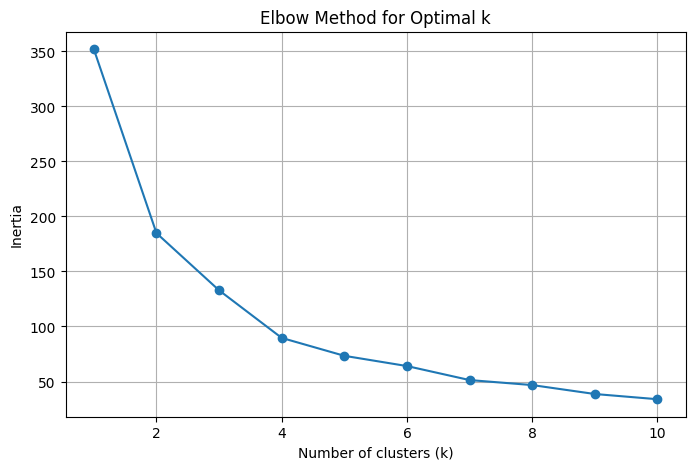

In [47]:
# Select numerical features for clustering
features = mtcars[['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [48]:

# Based on the Elbow plot, choose k (let's say k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
mtcars['Cluster'] = kmeans.fit_predict(features_scaled)

# Silhouette score for the clustering
silhouette_avg = silhouette_score(features_scaled, mtcars['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Display the resulting clusters
print(mtcars[['model', 'Cluster']])

Silhouette Score: 0.43
                  model  Cluster
0             Mazda RX4        2
1         Mazda RX4 Wag        2
2            Datsun 710        3
3        Hornet 4 Drive        1
4     Hornet Sportabout        0
5               Valiant        1
6            Duster 360        0
7             Merc 240D        1
8              Merc 230        1
9              Merc 280        1
10            Merc 280C        1
11           Merc 450SE        0
12           Merc 450SL        0
13          Merc 450SLC        0
14   Cadillac Fleetwood        0
15  Lincoln Continental        0
16    Chrysler Imperial        0
17             Fiat 128        3
18          Honda Civic        3
19       Toyota Corolla        3
20        Toyota Corona        1
21     Dodge Challenger        0
22          AMC Javelin        0
23           Camaro Z28        0
24     Pontiac Firebird        0
25            Fiat X1-9        3
26        Porsche 914-2        3
27         Lotus Europa        3
28       Ford Panter

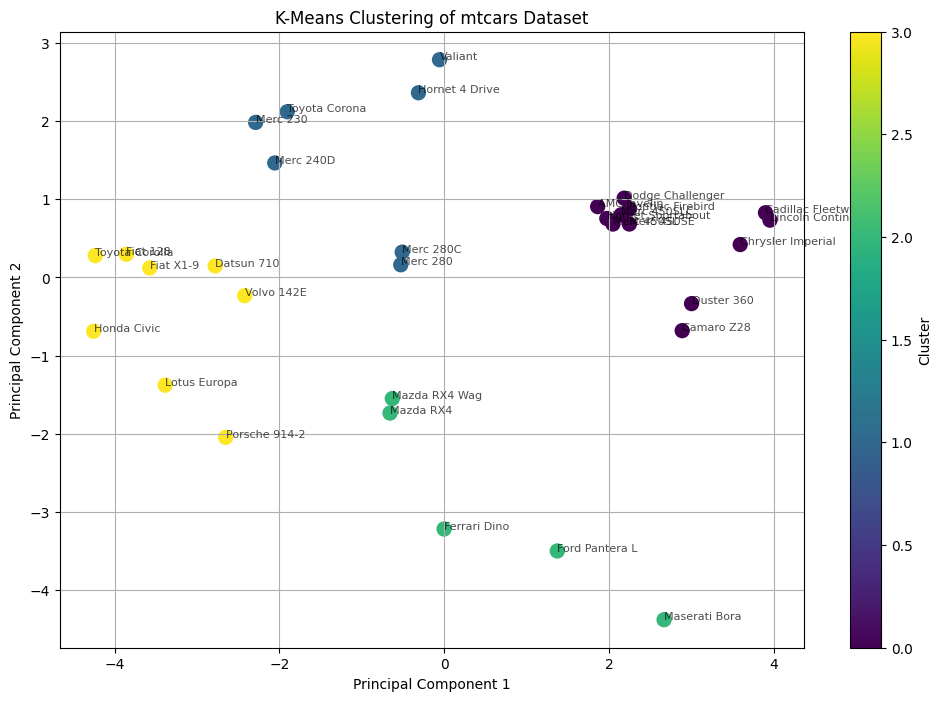

In [51]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = mtcars['Cluster']
pca_df['Model'] = mtcars['model']

# Plot the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=100)

# Annotate the model names
for i in range(pca_df.shape[0]):
    plt.annotate(pca_df['Model'].iloc[i], (pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i]),
                 fontsize=8, alpha=0.7)

plt.title('K-Means Clustering of mtcars Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

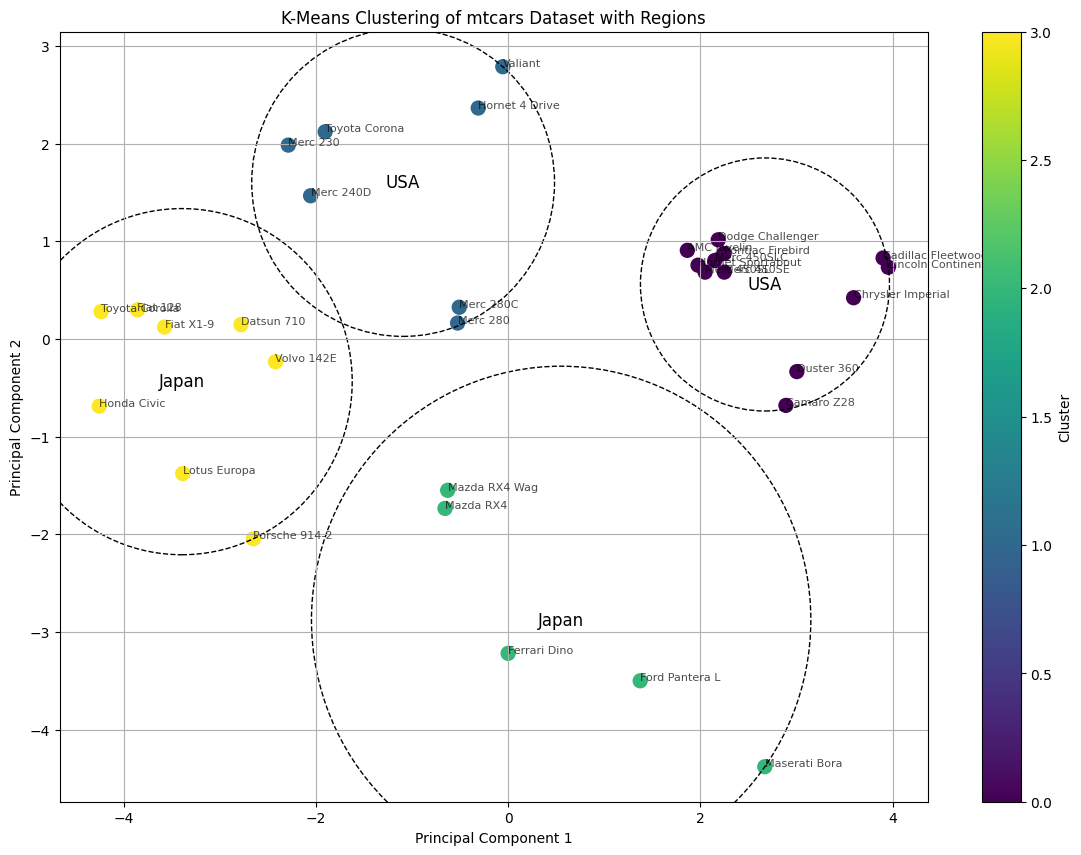

In [60]:
# Define regions for each model (for demonstration)
regions = {
    'Mazda RX4': 'Japan', 'Mazda RX4 Wag': 'Japan', 'Datsun 710': 'Japan', 
    'Hornet 4 Drive': 'USA', 'Hornet Sportabout': 'USA', 'Valiant': 'USA', 
    'Duster 360': 'USA', 'Merc 240D': 'Germany', 'Merc 230': 'Germany', 
    'Merc 280': 'Germany', 'Merc 280C': 'Germany', 'Merc 450SE': 'Germany', 
    'Merc 450SL': 'Germany', 'Merc 450SLC': 'Germany', 'Cadillac Fleetwood': 'USA', 
    'Lincoln Continental': 'USA', 'Chrysler Imperial': 'USA', 'Fiat 128': 'Italy', 
    'Honda Civic': 'Japan', 'Toyota Corolla': 'Japan', 'Datsun 510': 'Japan', 
    'Morris Oxford': 'UK', 'Triumph Herald': 'UK', 'Volkswagen 1131 Deluxe Sedan': 'Germany', 
    'Peugeot 504': 'France', 'Audi 100 LS': 'Germany', 'Saab 99E': 'Sweden', 
    'BMW 2002': 'Germany', 'Porsche 914-2': 'Germany', 'Lotus Europa': 'UK', 
    'Ford Pantera L': 'USA', 'Ferrari Dino': 'Italy', 'Maserati Bora': 'Italy', 
    'Volvo 142E': 'Sweden'
}

# Map regions to the DataFrame
mtcars['Region'] = mtcars['model'].map(regions)

# Select numerical features for clustering
features = mtcars[['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-Means Clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
mtcars['Cluster'] = kmeans.fit_predict(features_scaled)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA results, cluster labels, and regions
pca_df = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = mtcars['Cluster']
pca_df['Model'] = mtcars['model']
pca_df['Region'] = mtcars['Region']

# Plot the clusters
plt.figure(figsize=(14, 10))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=100)

# Calculate centroids for each cluster
centroids = pca_df.groupby('Cluster')[['PC1', 'PC2']].mean().reset_index()

# Draw circles around each cluster with dynamic radius
for i, row in centroids.iterrows():
    # Get the points in this cluster
    cluster_points = pca_df[pca_df['Cluster'] == row['Cluster']]
    
    # Calculate maximum distance to the centroid for the circle radius
    max_distance = np.max(np.sqrt((cluster_points['PC1'] - row['PC1'])**2 + (cluster_points['PC2'] - row['PC2'])**2))
    
    # Draw the circle with the calculated radius
    circle = plt.Circle((row['PC1'], row['PC2']), max_distance, color='black', fill=False, linestyle='dashed')
    plt.gca().add_artist(circle)
    
    # Get the region name for that cluster (use the first occurrence)
    region_name = cluster_points['Region'].values[0]
    plt.annotate(region_name, (row['PC1'], row['PC2']), color='black',
                 fontsize=12, ha='center', va='center')

# Annotate the model names
for i in range(pca_df.shape[0]):
    plt.annotate(pca_df['Model'].iloc[i], (pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i]),
                 fontsize=8, alpha=0.7)

plt.title('K-Means Clustering of mtcars Dataset with Regions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

# Hierrical clustering

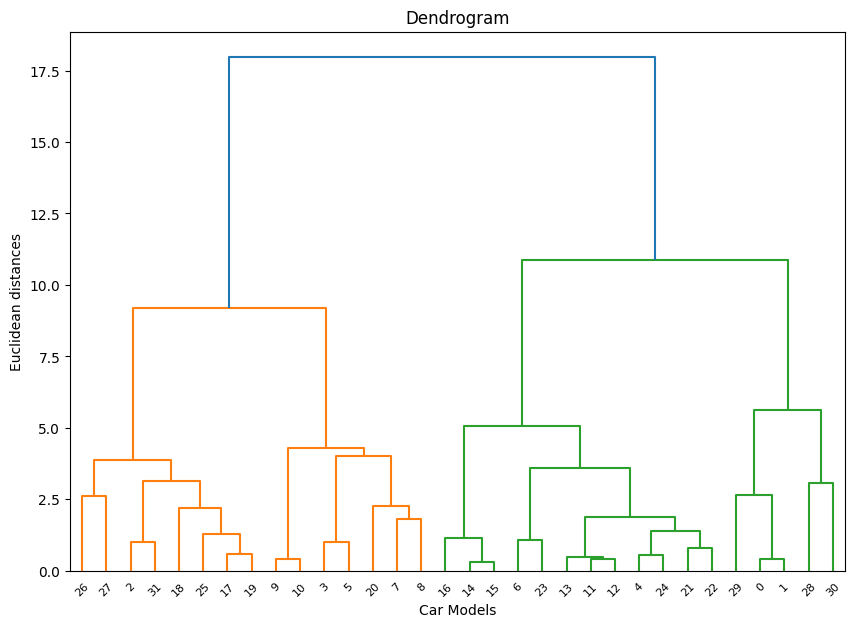

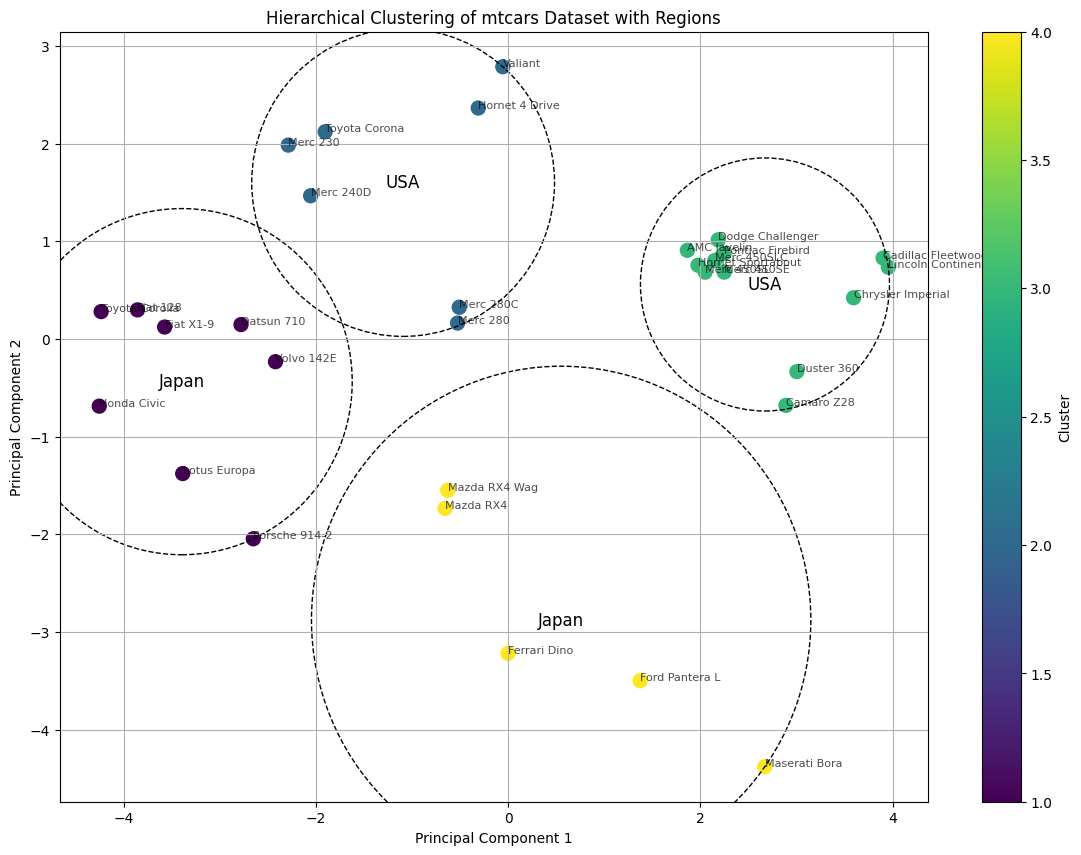

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load the Titanic dataset
mtcars = pd.read_csv(filepath_or_buffer=r"data\Titanic\mtcars.csv")
mtcars

# Define regions for each model (for demonstration)
regions = {
    'Mazda RX4': 'Japan', 'Mazda RX4 Wag': 'Japan', 'Datsun 710': 'Japan', 
    'Hornet 4 Drive': 'USA', 'Hornet Sportabout': 'USA', 'Valiant': 'USA', 
    'Duster 360': 'USA', 'Merc 240D': 'Germany', 'Merc 230': 'Germany', 
    'Merc 280': 'Germany', 'Merc 280C': 'Germany', 'Merc 450SE': 'Germany', 
    'Merc 450SL': 'Germany', 'Merc 450SLC': 'Germany', 'Cadillac Fleetwood': 'USA', 
    'Lincoln Continental': 'USA', 'Chrysler Imperial': 'USA', 'Fiat 128': 'Italy', 
    'Honda Civic': 'Japan', 'Toyota Corolla': 'Japan', 'Datsun 510': 'Japan', 
    'Morris Oxford': 'UK', 'Triumph Herald': 'UK', 'Volkswagen 1131 Deluxe Sedan': 'Germany', 
    'Peugeot 504': 'France', 'Audi 100 LS': 'Germany', 'Saab 99E': 'Sweden', 
    'BMW 2002': 'Germany', 'Porsche 914-2': 'Germany', 'Lotus Europa': 'UK', 
    'Ford Pantera L': 'USA', 'Ferrari Dino': 'Italy', 'Maserati Bora': 'Italy', 
    'Volvo 142E': 'Sweden'
}

# Map regions to the DataFrame
mtcars['Region'] = mtcars['model'].map(regions)

# Select numerical features for clustering
features = mtcars[['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform hierarchical clustering using Ward's method
Z = linkage(features_scaled, method='ward')

# Determine the number of clusters from the dendrogram
# For this example, we will define the number of clusters directly
# You can create a dendrogram to visualize and select an appropriate number of clusters
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Car Models')
plt.ylabel('Euclidean distances')
plt.show()

# Let's say we decided to cut the dendrogram to form 4 clusters
num_clusters = 4
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')

# Create a PCA transformation for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA results, cluster labels, and regions
pca_df = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
pca_df['Model'] = mtcars['model']
pca_df['Region'] = mtcars['Region']

# Plot the clusters
plt.figure(figsize=(14, 10))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=100)

# Calculate centroids for each cluster
centroids = pca_df.groupby('Cluster')[['PC1', 'PC2']].mean().reset_index()

# Draw circles around each cluster with dynamic radius
for i, row in centroids.iterrows():
    # Get the points in this cluster
    cluster_points = pca_df[pca_df['Cluster'] == row['Cluster']]
    
    # Calculate maximum distance to the centroid for the circle radius
    max_distance = np.max(np.sqrt((cluster_points['PC1'] - row['PC1'])**2 + (cluster_points['PC2'] - row['PC2'])**2))
    
    # Draw the circle with the calculated radius
    circle = plt.Circle((row['PC1'], row['PC2']), max_distance, color='black', fill=False, linestyle='dashed')
    plt.gca().add_artist(circle)
    
    # Get the region name for that cluster (use the first occurrence)
    region_name = cluster_points['Region'].values[0]
    plt.annotate(region_name, (row['PC1'], row['PC2']), color='black',
                 fontsize=12, ha='center', va='center')

# Annotate the model names
for i in range(pca_df.shape[0]):
    plt.annotate(pca_df['Model'].iloc[i], (pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i]),
                 fontsize=8, alpha=0.7)

plt.title('Hierarchical Clustering of mtcars Dataset with Regions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()